# **demo-2**
**dataset**: [germany-wind-energy]([link]https://www.kaggle.com/datasets/aymanlafaz/wind-energy-germany/)

**selection rationale**: i like wind turbines, and i have work experience in wind energy, so i felt the topic would be useful for future jobs

---

### analysis objectives and plan

1. **objective 1**: visualize how the generation capcity of wind energy in germany changed over 6 month time intervals
- step 1: convert the date column into the  `datetime` data type
- step 2: divide dataset into 6 month time bins
- step 3: calculate the mean wind energy capacity for each time bin
- step 4: print a table of the mean wind energy capacity for each time bin
- step 5: plot a bar graph of the mean wind energy capacity for each time bin
2. **objective 2**: identify the mean annual temperatures, the lowest temperatures recorded each year, and plot annual temperature changes on a graph
- step 0: seperate the original .csv into 3 seperate files, one for each year (not through vs code, this was done in excel)
- step 1: read each new .csv file into a new dataframe
- step 2: convert each new .csv date column into the `datetime` data type (again)
- step 3: calculate and print the minimum temperature for each year
- step 4: calculate and print the mean temperature for each year
- step 5: plot each year as a different line on the same graph (actual changes and dotten mean lines)
- step 6: plot the minimum temperature for each year with a dot marker
3. **objective 3**: calculate and create a list of the number of days the temperature in Germany was below -5 degrees celsius, and determine and print the number of days the temperature average was over 20 degrees celsius in germany
- step 1: filter rows where temperature is below -5 degrees celsius
- step 2: filter rows where temperature is above 20 degrees celsius
- step 3: calculate the number of days in each filter above
- step 4: print the results, including the UTC time periods associated with each day below -5 degrees celsius and above 20 degrees celsius
- step 5: plot the number of days below -5 degrees celsius and above 20 degrees celsius on a pie chart 
step 6: assess if there is a correlation between temperature and actual wind generation in germany, and plot this correlation on a graph


For objective 2, you could also  create 3 different dataframes instead of 3 files with excel.

---

### import libraries

In [1]:
# import necessary libraries
import pandas as pd

Noice.

### import and explore data
- import dataset and assign to a variable named `df`
- print/output the following (as pythonically as possible [spacing, capitals, etc.]):
    - dataframe's shape
    - column names
    - first 5 rows

In [2]:
# import data from .csv file
df = pd.read_csv('germany-wind-energy.csv')
df

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
...,...,...,...,...
1089,2019-12-26 00:00:00+00:00,132739.0,50424.125,2.790
1090,2019-12-27 00:00:00+00:00,146590.0,50427.000,1.327
1091,2019-12-28 00:00:00+00:00,159126.0,50427.292,-1.441
1092,2019-12-29 00:00:00+00:00,349839.0,50434.750,-1.314


In [3]:
# output df(shape)

print('shape: ', df.shape)

# output df(columns)

print('columns: ', df.columns)


shape:  (1094, 4)
columns:  Index(['utc_timestamp', 'wind_generation_actual', 'wind_capacity',
       'temperature'],
      dtype='object')


In [4]:
# output df(first 5 rows)
df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


Outputs look good for this section.

---

### objective 1

In [5]:
# step 1: convert the date column (utc_timestamp) to datetime format
df = pd.read_csv('germany-wind-energy.csv')
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

In [6]:
# step 2: divide dataset into 6 month time intervals starting at 2017-01-01 00:00:00+00:00
df['6m_int'] = pd.cut(df['utc_timestamp'], bins=6, labels=['Jan - Jun 2017', 'Jul - Dec 2017', 'Jan - Jun 2018', 'Jul - Dec 2018', 'Jan - Jun 2019', 'Jul - Dec 2019'])

In [7]:
# step 3: calculate the mean wind energy capacity for each time bin
mean_capacity = df.groupby('6m_int')['wind_capacity'].mean()

/var/folders/0l/0v0fs3qn6fj5_t8q0rq9m77h0000gn/T/ipykernel_24379/2410018567.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_capacity = df.groupby('6m_int')['wind_capacity'].mean()


In [8]:
# step 4: print the mean wind energy capacity for each time bin
print(mean_capacity)

6m_int
Jan - Jun 2017    38322.663060
Jul - Dec 2017    41173.541907
Jan - Jun 2018    44279.818489
Jul - Dec 2018    47459.012374
Jan - Jun 2019    49200.832181
Jul - Dec 2019    49970.373169
Name: wind_capacity, dtype: float64


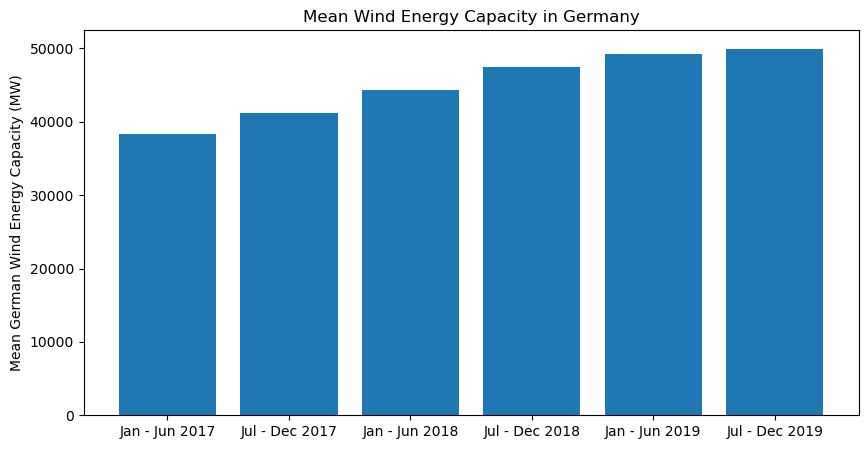

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize = (10, 5))
x = mean_capacity.index
heights = mean_capacity.values
ax.bar(x, heights)
ax.set_title('Mean Wind Energy Capacity in Germany')
ax.set_ylabel('Mean German Wind Energy Capacity (MW)')
width = 0.35

The code for this objective and the plot looks good! Also note that libraries and packages should all be imported at the beginning of the file.

---

### objective 2

In [10]:
# step 1: read each new .csv file into a new dataframe
df2017 = pd.read_csv('germany-wind-energy-2017.csv')
df2018 = pd.read_csv('germany-wind-energy-2018.csv')
df2019 = pd.read_csv('germany-wind-energy-2019.csv')


In [11]:
# step 2: convert each new .csv date column into the `datetime` data type (again)
df2017['utc_timestamp2017'] = pd.to_datetime(df2017['utc_timestamp2017'])
df2018['utc_timestamp2018'] = pd.to_datetime(df2018['utc_timestamp2018'])
df2019['utc_timestamp2019'] = pd.to_datetime(df2019['utc_timestamp2019'])

In [12]:
# step 3: calculate and print the minimum temperature for each year
min_temp2017 = df2017['temperature2017'].min()
min_temp2018 = df2018['temperature2018'].min()
min_temp2019 = df2019['temperature2019'].min()
print('2017 min temp: ', min_temp2017, '°C')
print('2018 min temp: ', min_temp2018, '°C')
print('2019 min temp: ', min_temp2019, '°C')

2017 min temp:  -7.724 °C
2018 min temp:  -9.363 °C
2019 min temp:  -5.313 °C


In [13]:
# step 4: calculate and print the mean temperature for each year
mean_temp2017 = df2017['temperature2017'].mean()
mean_temp2018 = df2018['temperature2018'].mean()
mean_temp2019 = df2019['temperature2019'].mean()
print('2017 mean temp: ', mean_temp2017, '°C')
print('2018 mean temp: ', mean_temp2018, '°C')
print('2019 mean temp: ', mean_temp2019, '°C')

2017 mean temp:  9.39088493150685 °C
2018 mean temp:  10.474446575342466 °C
2019 mean temp:  10.285815934065935 °C


/var/folders/0l/0v0fs3qn6fj5_t8q0rq9m77h0000gn/T/ipykernel_24379/780080372.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(months)


Text(0.5, 1.0, 'German Temperature 2017-2019')

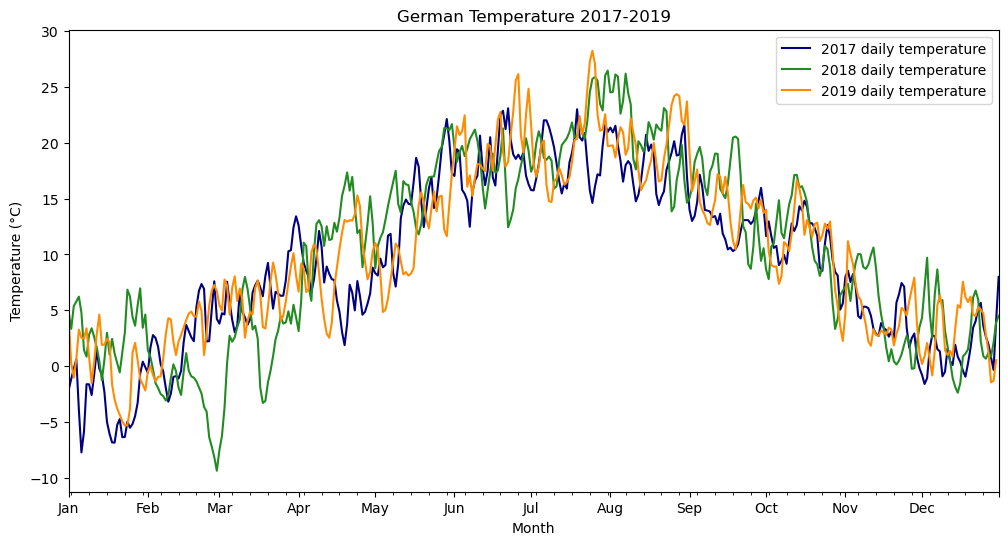

In [16]:
# step 5: plot each year as a different line on the same graph (actual changes and lowest recorded annual temperatures)
fig, ax = plt.subplots(figsize = (12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

ax.set_xticks(range(0, 12))

df2017.plot(x='utc_timestamp2017', y='temperature2017', ax=ax, label='2017 daily temperature', color='navy')
df2018.plot(x='utc_timestamp2018', y='temperature2018', ax=ax, label='2018 daily temperature', color='forestgreen')
df2019.plot(x='utc_timestamp2019', y='temperature2019', ax=ax, label='2019 daily temperature', color='darkorange')

ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('German Temperature 2017-2019')



Code for this section looks good except you would want to include plt.show() at the end of this cell above. This would remove the text you see above the graph.

---

### objective 3

In [17]:
# step 1: filter rows where temperature is below -5 degrees celsius
below5 = df[df['temperature'] < -5]


In [18]:
# step 2: filter rows where temperature is above 20 degrees celsius
above20 = df[df['temperature'] > 20]

In [19]:
# step 3: calculate the number of days in each filter above
below5_days = below5.shape[0]
above20_days = above20.shape[0]

In [20]:
# step 4: print the results, including the UTC time periods associated with each day below -5 degrees celsius and above 20 degrees celsius
print('days below -5°C: ', below5_days)
print('days above 20°C: ', above20_days)

print(below5['utc_timestamp'])
print(above20['utc_timestamp'])

days below -5°C:  18
days above 20°C:  120
5     2017-01-06 00:00:00+00:00
6     2017-01-07 00:00:00+00:00
16    2017-01-17 00:00:00+00:00
17    2017-01-18 00:00:00+00:00
18    2017-01-19 00:00:00+00:00
19    2017-01-20 00:00:00+00:00
21    2017-01-22 00:00:00+00:00
22    2017-01-23 00:00:00+00:00
24    2017-01-25 00:00:00+00:00
25    2017-01-26 00:00:00+00:00
420   2018-02-25 00:00:00+00:00
421   2018-02-26 00:00:00+00:00
422   2018-02-27 00:00:00+00:00
423   2018-02-28 00:00:00+00:00
424   2018-03-01 00:00:00+00:00
425   2018-03-02 00:00:00+00:00
752   2019-01-23 00:00:00+00:00
753   2019-01-24 00:00:00+00:00
Name: utc_timestamp, dtype: datetime64[ns, UTC]
147   2017-05-28 00:00:00+00:00
148   2017-05-29 00:00:00+00:00
149   2017-05-30 00:00:00+00:00
161   2017-06-11 00:00:00+00:00
165   2017-06-15 00:00:00+00:00
                 ...           
968   2019-08-27 00:00:00+00:00
969   2019-08-28 00:00:00+00:00
970   2019-08-29 00:00:00+00:00
971   2019-08-30 00:00:00+00:00
972   2019-08

Text(0.5, 1.0, 'German Temperature Distribution 2017-2019')

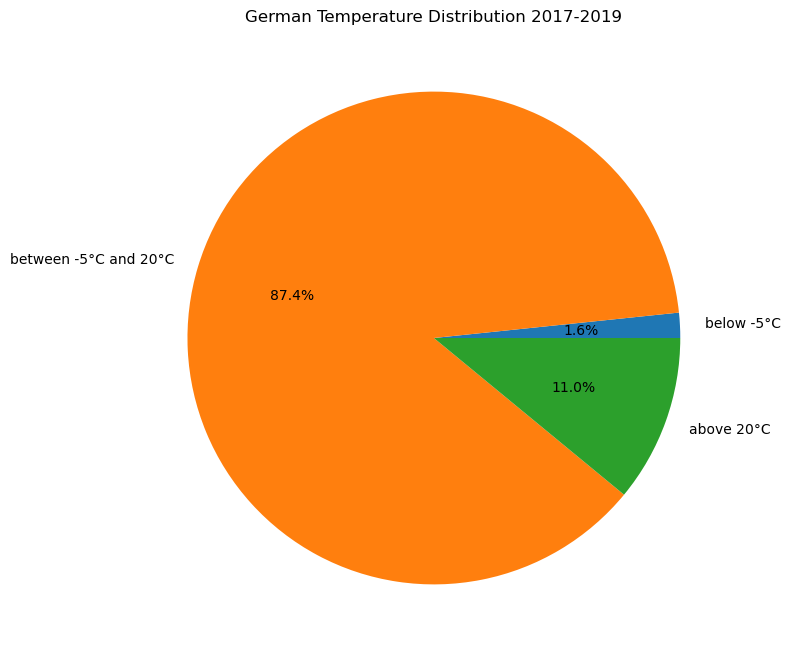

In [21]:
# step 5: plot the number of days below -5 degrees celsius, the number of days in between -5 degrees celsius and 20 degrees celsius, and the number of days above 20 degrees celsius on a pie chart
fig, ax = plt.subplots(figsize = (8, 8))
labels = ['below -5°C', 'between -5°C and 20°C', 'above 20°C']
sizes = [below5_days, df.shape[0] - below5_days - above20_days, above20_days]
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('German Temperature Distribution 2017-2019')


correlation:  -0.3258306158742441


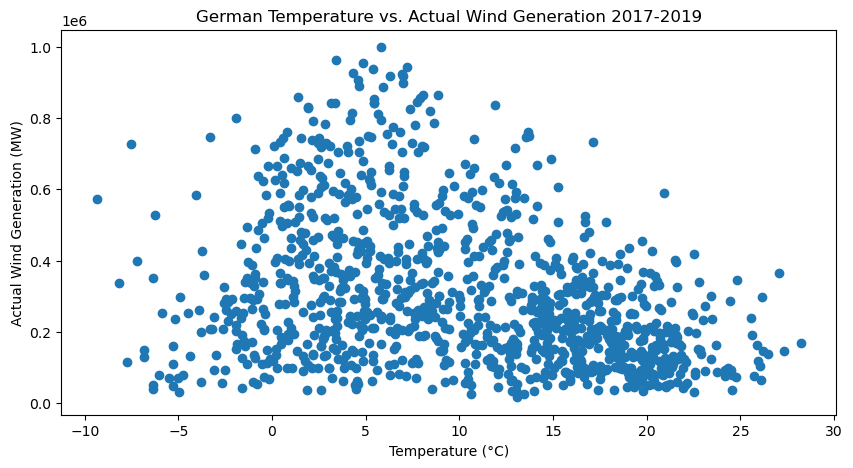

In [413]:
# step 6: assess if there is a correlation between temperature and actual wind generation in germany, and plot this correlation on a graph
fig, ax = plt.subplots(figsize = (10, 5))
x = df['temperature']
y = df['wind_generation_actual']
ax.scatter(x, y)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Actual Wind Generation (MW)')
ax.set_title('German Temperature vs. Actual Wind Generation 2017-2019')

correlation = df['wind_generation_actual'].corr(df['temperature'])
print('correlation: ', correlation)


This section looks great too! Again, just keep in mind you will want to include plt.show() when plotting.

---

### conclusions

**objective 1** shows a graph of wind energy capacity in germany over 6 month time intervals. this graph shows how me that capacity of wind energy installed in germany is steadily increasing (woo). this shows me that each 6 month interval recorded have a higher installed capacity than the previous. this shows me that dataframes are a great way to analyze large amounts of data for visualizations. i couls see myself or someone using such raphs in a thesis, social media campaigns, government documents. overall, this graph shows me that the german energy sector is moving towards a more sustainable future.

**objective 2** shows a mean temperature graph for a three year period in germany. this graph shows me that germany has a similar climate to nova scotia, with the highest temperatures in the months of june-september, and the lowest temperatures in the months of december-march. this visualization also shows me how there is significant monthly temperature volatility in germany, with the temperature changing by 10 degrees or more in some months. this would be very useful for visualizing temperature patterns to do a rough estimate of what months a developper could expect the most production (low temperature and humidity is correlated with high production in NS). finally, the mininmum temperature list shows me that the coldest times of year in NS are somewhat colder than germany.

**objective 3** shows a list of dates where the temperature is above 20 degrees or below -5 degrees, this is very useful because extreme temperatures are an important part in choosing a turbine model for a given area. this shows me that the winters in NS are typically colder than in germany, but the summers are pretty similar. if a site often goes under -5 degrees, a developer would know they have to purchase a cold climate turbine package (as a warm climate package would get damaged after 1 season). the associated pie chart is something very similar to internal documents from turbine manufacturers that i have seen before. finally, the correlation graph was a test because I wanted to see if in germany temperature is correlated to wind production, this would be useful for identifying what times of year will need batteries or other power options to supplement the grid. even though this was not a strong correlation, knowing something isn't correlated is still useful because it just shows that we have to look for correlations elsewhere.

p.s. sorry my demos have been so focused on wind energy, i just really like wind turbines lolz and this feels most applicable to my future career opions

No need to apologize, I enjoy learning more about wind energy through you! ALso, top-notch job in your conclusions.